In [14]:
import scipy.io
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.callbacks import EarlyStopping
import random

In [15]:
# 기존 train 데이터 불러오기
origin_data = scipy.io.loadmat('../datas/new/train_data_6.mat', squeeze_me=True)['train_signal']
#origin_data = scipy.io.loadmat('../datas/v1/origin_data.mat', squeeze_me=True)['origin_data']
#origin_data = origin_data.reshape(11, 874496, 2)
print('origin_data shape \n', origin_data.shape, '\n')

# 기존 test 데이터 불러오기
origin_test_data = scipy.io.loadmat('../datas/v1/test_data.mat', squeeze_me=True)['test_data']
origin_test_data = origin_test_data.reshape(11, 173056, 2)
# print(origin_test_data[0, :, :])

# 퍼블릭 데이터1 불러오기
public_data1 = scipy.io.loadmat('../datas/v1/public_data1.mat', squeeze_me=True)['public_data1']
public_data1 = public_data1.reshape(10, 38401, 2)
print(public_data1[0, :, :])

[[ 14128826.10645505 -10222610.88876894]
 [ 14129850.10834715 -10219314.88267876]
 [ 14125498.10030575 -10226514.89598254]
 ...
 [ 14407866.62205052 -10037938.54754171]
 [ 14408858.62388348 -10035570.54316624]
 [ 14404474.61578296 -10040850.55292235]]


In [16]:
origin_sub_cnt = origin_data.shape[0]
public1_sub_cnt = public_data1.shape[0]

sub_cnt = origin_sub_cnt + public1_sub_cnt

print(sub_cnt)

21


In [17]:
# 데이터를 768(= 256*3) 크기로 사용할 수 있도록 그 배수로 전체 데이터 잘라줌
data_cut_size = 38400
# test_cut_size = 172800
test_cut_size = 38400

origin_data_cut = origin_data[:, 0:data_cut_size, :]
origin_test_cut = origin_test_data[:, 0:test_cut_size, :]
public_data1_cut = public_data1[:, 0:data_cut_size, :]

In [18]:
# 데이터를 스케일링 하기 위해 2D로 reshape
origin_data_2D = origin_data_cut.reshape(-1, 1)
origin_test_2D = origin_test_cut.reshape(-1, 1)
public_data1_2D = public_data1_cut.reshape(-1, 1)

In [19]:
# 데이터를 StandardScaler로 스케일링
# 데이터의 형태가 많이 다르기 때문에 따로 스케일링 해줘야함
SDscaler = StandardScaler()
SDscaler.fit(origin_data_2D)
origin_data_scaled = SDscaler.transform(origin_data_2D)
origin_test_scaled = SDscaler.transform(origin_test_2D)

SDscaler.fit(public_data1_2D)
public_data1_scaled = SDscaler.transform(public_data1_2D)

# 스케일링 후 train_data 합쳐줌
train_data = np.append(origin_data_scaled, public_data1_scaled)
train_data = train_data.reshape(-1, 1)

In [20]:
# 데이터 크기를 768크기로 다시 맞춰줌
data_size = 768
train_sub_size = 50
test_sub_size = 50
train_data = train_data.reshape((origin_sub_cnt + public1_sub_cnt) * train_sub_size, data_size, 2)
test_data = origin_test_scaled.reshape(origin_sub_cnt * test_sub_size, data_size, 2)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 768, 2)]          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 768, 16)           112       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 256, 16)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 256, 32)           1568      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 85, 32)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 85, 64)            6208      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 28, 64)            0   

24/24 [==============================] - 0s 17ms/step - loss: 0.0312 - accuracy: 0.9915 - val_loss: 0.4576 - val_accuracy: 0.9333
Epoch 45/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0225 - accuracy: 0.9905 - val_loss: 0.4553 - val_accuracy: 0.9143
Epoch 46/200
24/24 [==============================] - 0s 16ms/step - loss: 0.0238 - accuracy: 0.9926 - val_loss: 0.5004 - val_accuracy: 0.9524
Epoch 47/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0159 - accuracy: 0.9926 - val_loss: 0.5727 - val_accuracy: 0.9429
Epoch 48/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0140 - accuracy: 0.9958 - val_loss: 0.5346 - val_accuracy: 0.9429
Epoch 49/200
24/24 [==============================] - 0s 16ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.5298 - val_accuracy: 0.9524
Epoch 50/200
24/24 [==============================] - 0s 17ms/step - loss: 8.7975e-04 - accuracy: 1.0000 - val_loss: 0.6326 - val_accuracy: 0.9429
Epoch 51

24/24 [==============================] - 0s 16ms/step - loss: 5.6854e-06 - accuracy: 1.0000 - val_loss: 0.7939 - val_accuracy: 0.9524
Epoch 101/200
24/24 [==============================] - 0s 17ms/step - loss: 1.2822e-05 - accuracy: 1.0000 - val_loss: 0.7992 - val_accuracy: 0.9524
Epoch 102/200
24/24 [==============================] - 0s 17ms/step - loss: 4.4381e-05 - accuracy: 1.0000 - val_loss: 0.7932 - val_accuracy: 0.9524
Epoch 103/200
24/24 [==============================] - 0s 17ms/step - loss: 3.0806e-05 - accuracy: 1.0000 - val_loss: 0.7958 - val_accuracy: 0.9524
Epoch 104/200
24/24 [==============================] - 0s 17ms/step - loss: 4.3125e-06 - accuracy: 1.0000 - val_loss: 0.7996 - val_accuracy: 0.9524
Epoch 105/200
24/24 [==============================] - 0s 17ms/step - loss: 1.8089e-06 - accuracy: 1.0000 - val_loss: 0.8009 - val_accuracy: 0.9524
Epoch 106/200
24/24 [==============================] - 0s 17ms/step - loss: 1.2478e-05 - accuracy: 1.0000 - val_loss: 0.8040 -

Epoch 156/200
24/24 [==============================] - 0s 17ms/step - loss: 1.1878e-05 - accuracy: 1.0000 - val_loss: 0.8326 - val_accuracy: 0.9524
Epoch 157/200
24/24 [==============================] - 0s 16ms/step - loss: 1.3483e-05 - accuracy: 1.0000 - val_loss: 0.8361 - val_accuracy: 0.9524
Epoch 158/200
24/24 [==============================] - 0s 17ms/step - loss: 4.6516e-06 - accuracy: 1.0000 - val_loss: 0.8392 - val_accuracy: 0.9524
Epoch 159/200
24/24 [==============================] - 0s 17ms/step - loss: 1.8610e-05 - accuracy: 1.0000 - val_loss: 0.8478 - val_accuracy: 0.9524
Epoch 160/200
24/24 [==============================] - 0s 17ms/step - loss: 3.9474e-06 - accuracy: 1.0000 - val_loss: 0.8538 - val_accuracy: 0.9524
Epoch 161/200
24/24 [==============================] - 0s 17ms/step - loss: 1.3154e-06 - accuracy: 1.0000 - val_loss: 0.8558 - val_accuracy: 0.9524
Epoch 162/200
24/24 [==============================] - 0s 17ms/step - loss: 3.9316e-06 - accuracy: 1.0000 - val_

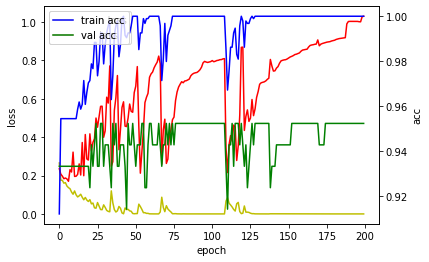

18/18 - 0s - loss: 2.2311 - accuracy: 0.8982
[[494   6]
 [ 50   0]]

 [500  50]
sensitivity :  0.0
specificity :  0.988


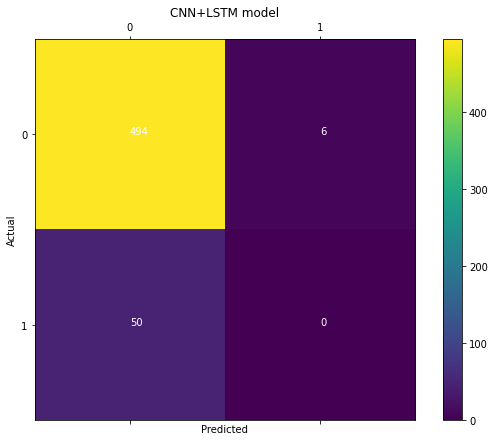

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 768, 2)]          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 768, 16)           112       
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 256, 16)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 256, 32)           1568      
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 85, 32)            0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 85, 64)            6208      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 28, 64)            0   

24/24 [==============================] - 0s 16ms/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0836 - val_accuracy: 0.9905
Epoch 45/200
24/24 [==============================] - 0s 16ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1236 - val_accuracy: 0.9810
Epoch 46/200
24/24 [==============================] - 0s 16ms/step - loss: 1.6607e-04 - accuracy: 1.0000 - val_loss: 0.1426 - val_accuracy: 0.9810
Epoch 47/200
24/24 [==============================] - 0s 17ms/step - loss: 8.5507e-04 - accuracy: 0.9989 - val_loss: 0.1391 - val_accuracy: 0.9810
Epoch 48/200
24/24 [==============================] - 0s 16ms/step - loss: 0.0015 - accuracy: 0.9989 - val_loss: 0.1755 - val_accuracy: 0.9810
Epoch 49/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0073 - accuracy: 0.9979 - val_loss: 0.1211 - val_accuracy: 0.9810
Epoch 50/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0063 - accuracy: 0.9989 - val_loss: 0.1120 - val_accuracy: 0.9905
Epoc

24/24 [==============================] - 0s 17ms/step - loss: 0.0014 - accuracy: 0.9989 - val_loss: 0.1923 - val_accuracy: 0.9810
Epoch 101/200
24/24 [==============================] - 0s 17ms/step - loss: 5.1766e-04 - accuracy: 1.0000 - val_loss: 0.1484 - val_accuracy: 0.9810
Epoch 102/200
24/24 [==============================] - 0s 17ms/step - loss: 2.5297e-04 - accuracy: 1.0000 - val_loss: 0.1524 - val_accuracy: 0.9810
Epoch 103/200
24/24 [==============================] - 0s 17ms/step - loss: 5.1990e-05 - accuracy: 1.0000 - val_loss: 0.1583 - val_accuracy: 0.9810
Epoch 104/200
24/24 [==============================] - 0s 17ms/step - loss: 5.8188e-05 - accuracy: 1.0000 - val_loss: 0.1745 - val_accuracy: 0.9810
Epoch 105/200
24/24 [==============================] - 0s 17ms/step - loss: 1.4937e-04 - accuracy: 1.0000 - val_loss: 0.1922 - val_accuracy: 0.9810
Epoch 106/200
24/24 [==============================] - 0s 17ms/step - loss: 6.6416e-05 - accuracy: 1.0000 - val_loss: 0.2113 - val

24/24 [==============================] - 0s 17ms/step - loss: 8.2223e-07 - accuracy: 1.0000 - val_loss: 0.2708 - val_accuracy: 0.9810
Epoch 156/200
24/24 [==============================] - 0s 17ms/step - loss: 1.2579e-06 - accuracy: 1.0000 - val_loss: 0.2711 - val_accuracy: 0.9810
Epoch 157/200
24/24 [==============================] - 0s 17ms/step - loss: 3.7960e-05 - accuracy: 1.0000 - val_loss: 0.2717 - val_accuracy: 0.9810
Epoch 158/200
24/24 [==============================] - 0s 17ms/step - loss: 2.5161e-06 - accuracy: 1.0000 - val_loss: 0.2749 - val_accuracy: 0.9810
Epoch 159/200
24/24 [==============================] - 0s 17ms/step - loss: 1.5084e-05 - accuracy: 1.0000 - val_loss: 0.2751 - val_accuracy: 0.9810
Epoch 160/200
24/24 [==============================] - 0s 17ms/step - loss: 1.8954e-06 - accuracy: 1.0000 - val_loss: 0.2687 - val_accuracy: 0.9810
Epoch 161/200
24/24 [==============================] - 0s 17ms/step - loss: 8.5222e-07 - accuracy: 1.0000 - val_loss: 0.2689 -

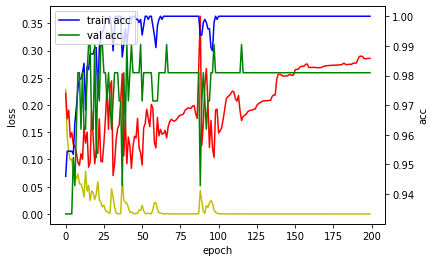

18/18 - 0s - loss: 1.8884 - accuracy: 0.9055
[[492   8]
 [ 44   6]]

 [500  50]
sensitivity :  0.12
specificity :  0.984


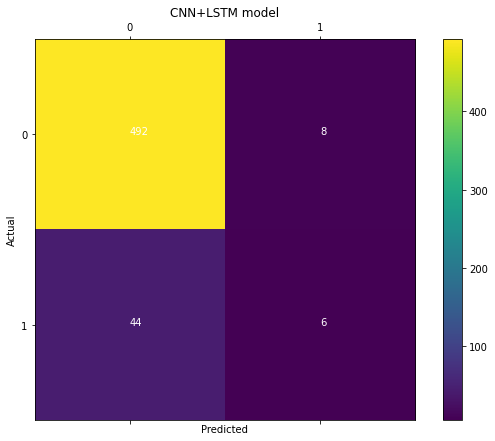

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 768, 2)]          0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 768, 16)           112       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 256, 16)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 256, 32)           1568      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 85, 32)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 85, 64)            6208      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 28, 64)            0   

24/24 [==============================] - 0s 17ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.9391 - val_accuracy: 0.9143
Epoch 45/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0022 - accuracy: 0.9989 - val_loss: 1.0049 - val_accuracy: 0.9333
Epoch 46/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.9642 - val_accuracy: 0.9238
Epoch 47/200
24/24 [==============================] - 0s 16ms/step - loss: 5.7514e-04 - accuracy: 1.0000 - val_loss: 1.0038 - val_accuracy: 0.9238
Epoch 48/200
24/24 [==============================] - 0s 16ms/step - loss: 2.6289e-04 - accuracy: 1.0000 - val_loss: 1.0603 - val_accuracy: 0.9238
Epoch 49/200
24/24 [==============================] - 0s 16ms/step - loss: 2.1974e-04 - accuracy: 1.0000 - val_loss: 1.0883 - val_accuracy: 0.9238
Epoch 50/200
24/24 [==============================] - 0s 17ms/step - loss: 1.3606e-04 - accuracy: 1.0000 - val_loss: 1.1043 - val_accuracy: 0.9

Epoch 100/200
24/24 [==============================] - 0s 17ms/step - loss: 5.4353e-06 - accuracy: 1.0000 - val_loss: 1.3749 - val_accuracy: 0.9238
Epoch 101/200
24/24 [==============================] - 0s 17ms/step - loss: 5.9199e-06 - accuracy: 1.0000 - val_loss: 1.3754 - val_accuracy: 0.9238
Epoch 102/200
24/24 [==============================] - 0s 17ms/step - loss: 2.7061e-06 - accuracy: 1.0000 - val_loss: 1.3811 - val_accuracy: 0.9238
Epoch 103/200
24/24 [==============================] - 0s 17ms/step - loss: 5.0184e-06 - accuracy: 1.0000 - val_loss: 1.3835 - val_accuracy: 0.9238
Epoch 104/200
24/24 [==============================] - 0s 17ms/step - loss: 2.6787e-05 - accuracy: 1.0000 - val_loss: 1.3901 - val_accuracy: 0.9238
Epoch 105/200
24/24 [==============================] - 0s 17ms/step - loss: 3.5910e-06 - accuracy: 1.0000 - val_loss: 1.3966 - val_accuracy: 0.9238
Epoch 106/200
24/24 [==============================] - 0s 17ms/step - loss: 4.0504e-06 - accuracy: 1.0000 - val_

24/24 [==============================] - 0s 17ms/step - loss: 4.6512e-07 - accuracy: 1.0000 - val_loss: 1.5281 - val_accuracy: 0.9238
Epoch 156/200
24/24 [==============================] - 0s 17ms/step - loss: 3.5657e-07 - accuracy: 1.0000 - val_loss: 1.5287 - val_accuracy: 0.9238
Epoch 157/200
24/24 [==============================] - 0s 17ms/step - loss: 9.3212e-07 - accuracy: 1.0000 - val_loss: 1.5316 - val_accuracy: 0.9238
Epoch 158/200
24/24 [==============================] - 0s 17ms/step - loss: 1.2456e-06 - accuracy: 1.0000 - val_loss: 1.5346 - val_accuracy: 0.9238
Epoch 159/200
24/24 [==============================] - 0s 17ms/step - loss: 1.1475e-06 - accuracy: 1.0000 - val_loss: 1.5387 - val_accuracy: 0.9238
Epoch 160/200
24/24 [==============================] - 0s 17ms/step - loss: 2.0798e-06 - accuracy: 1.0000 - val_loss: 1.5426 - val_accuracy: 0.9238
Epoch 161/200
24/24 [==============================] - 0s 17ms/step - loss: 5.3727e-07 - accuracy: 1.0000 - val_loss: 1.5457 -

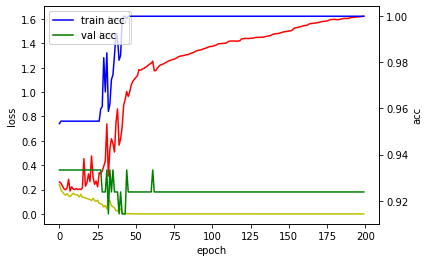

18/18 - 0s - loss: 1.9970 - accuracy: 0.9000
[[494   6]
 [ 49   1]]

 [500  50]
sensitivity :  0.02
specificity :  0.988


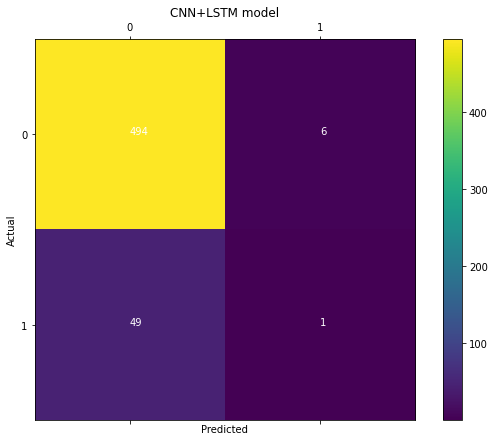

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 768, 2)]          0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 768, 16)           112       
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 256, 16)           0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 256, 32)           1568      
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 85, 32)            0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 85, 64)            6208      
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 28, 64)            0   

24/24 [==============================] - 0s 17ms/step - loss: 0.0316 - accuracy: 0.9894 - val_loss: 0.2816 - val_accuracy: 0.9429
Epoch 45/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0138 - accuracy: 0.9979 - val_loss: 0.2227 - val_accuracy: 0.9333
Epoch 46/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0105 - accuracy: 0.9989 - val_loss: 0.2586 - val_accuracy: 0.9429
Epoch 47/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0084 - accuracy: 0.9979 - val_loss: 0.3123 - val_accuracy: 0.9238
Epoch 48/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0184 - accuracy: 0.9958 - val_loss: 0.2972 - val_accuracy: 0.9333
Epoch 49/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0297 - accuracy: 0.9905 - val_loss: 0.2889 - val_accuracy: 0.9333
Epoch 50/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0361 - accuracy: 0.9894 - val_loss: 0.2368 - val_accuracy: 0.9143
Epoch 51/200

24/24 [==============================] - 0s 17ms/step - loss: 0.0148 - accuracy: 0.9968 - val_loss: 0.4570 - val_accuracy: 0.9143
Epoch 102/200
24/24 [==============================] - 0s 16ms/step - loss: 0.0056 - accuracy: 0.9979 - val_loss: 0.6577 - val_accuracy: 0.9429
Epoch 103/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0511 - accuracy: 0.9862 - val_loss: 0.3073 - val_accuracy: 0.9333
Epoch 104/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0115 - accuracy: 0.9958 - val_loss: 0.4426 - val_accuracy: 0.9238
Epoch 105/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.6512 - val_accuracy: 0.9143
Epoch 106/200
24/24 [==============================] - 0s 16ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.7334 - val_accuracy: 0.9143
Epoch 107/200
24/24 [==============================] - 0s 17ms/step - loss: 2.0957e-04 - accuracy: 1.0000 - val_loss: 0.7678 - val_accuracy: 0.9143
Ep

24/24 [==============================] - 0s 17ms/step - loss: 2.5871e-06 - accuracy: 1.0000 - val_loss: 1.2277 - val_accuracy: 0.9143
Epoch 157/200
24/24 [==============================] - 0s 17ms/step - loss: 6.4050e-07 - accuracy: 1.0000 - val_loss: 1.2342 - val_accuracy: 0.9143
Epoch 158/200
24/24 [==============================] - 0s 17ms/step - loss: 7.4588e-07 - accuracy: 1.0000 - val_loss: 1.2356 - val_accuracy: 0.9143
Epoch 159/200
24/24 [==============================] - 0s 17ms/step - loss: 2.9924e-06 - accuracy: 1.0000 - val_loss: 1.2417 - val_accuracy: 0.9143
Epoch 160/200
24/24 [==============================] - 0s 17ms/step - loss: 1.7491e-06 - accuracy: 1.0000 - val_loss: 1.2450 - val_accuracy: 0.9143
Epoch 161/200
24/24 [==============================] - 0s 17ms/step - loss: 2.6277e-06 - accuracy: 1.0000 - val_loss: 1.2481 - val_accuracy: 0.9143
Epoch 162/200
24/24 [==============================] - 0s 17ms/step - loss: 1.1997e-06 - accuracy: 1.0000 - val_loss: 1.2533 -

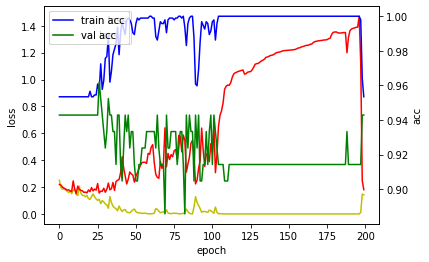

18/18 - 0s - loss: 0.3128 - accuracy: 0.9073
[[499   1]
 [ 50   0]]

 [500  50]
sensitivity :  0.0
specificity :  0.998


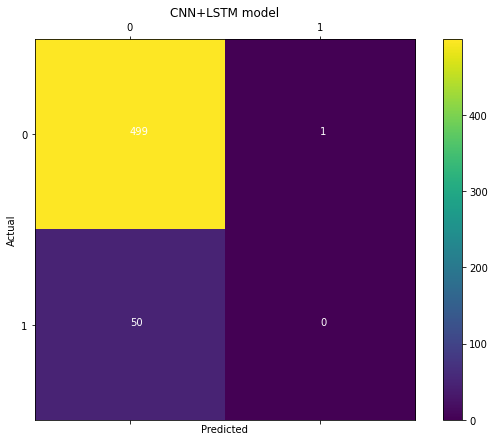

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 768, 2)]          0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 768, 16)           112       
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 256, 16)           0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 256, 32)           1568      
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 85, 32)            0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 85, 64)            6208      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 28, 64)            0   

24/24 [==============================] - 0s 17ms/step - loss: 0.0069 - accuracy: 0.9979 - val_loss: 0.5754 - val_accuracy: 0.9429
Epoch 45/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0372 - accuracy: 0.9852 - val_loss: 0.4136 - val_accuracy: 0.9333
Epoch 46/200
24/24 [==============================] - 0s 16ms/step - loss: 0.0127 - accuracy: 0.9968 - val_loss: 0.2696 - val_accuracy: 0.9524
Epoch 47/200
24/24 [==============================] - 0s 16ms/step - loss: 0.0061 - accuracy: 0.9989 - val_loss: 0.2225 - val_accuracy: 0.9429
Epoch 48/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.1963 - val_accuracy: 0.9524
Epoch 49/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0035 - accuracy: 0.9979 - val_loss: 0.2335 - val_accuracy: 0.9429
Epoch 50/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2146 - val_accuracy: 0.9429
Epoch 51/200

24/24 [==============================] - 0s 17ms/step - loss: 1.2519e-04 - accuracy: 1.0000 - val_loss: 0.5352 - val_accuracy: 0.9238
Epoch 101/200
24/24 [==============================] - 0s 17ms/step - loss: 8.2900e-05 - accuracy: 1.0000 - val_loss: 0.5483 - val_accuracy: 0.9238
Epoch 102/200
24/24 [==============================] - 0s 17ms/step - loss: 2.1219e-05 - accuracy: 1.0000 - val_loss: 0.5532 - val_accuracy: 0.9238
Epoch 103/200
24/24 [==============================] - 0s 17ms/step - loss: 1.5671e-04 - accuracy: 1.0000 - val_loss: 0.5620 - val_accuracy: 0.9238
Epoch 104/200
24/24 [==============================] - 0s 17ms/step - loss: 1.8375e-04 - accuracy: 1.0000 - val_loss: 0.5655 - val_accuracy: 0.9238
Epoch 105/200
24/24 [==============================] - 0s 17ms/step - loss: 2.8013e-05 - accuracy: 1.0000 - val_loss: 0.5604 - val_accuracy: 0.9238
Epoch 106/200
24/24 [==============================] - 0s 17ms/step - loss: 1.3522e-05 - accuracy: 1.0000 - val_loss: 0.5619 -

24/24 [==============================] - 0s 17ms/step - loss: 5.3158e-06 - accuracy: 1.0000 - val_loss: 0.6346 - val_accuracy: 0.9429
Epoch 156/200
24/24 [==============================] - 0s 17ms/step - loss: 1.1604e-06 - accuracy: 1.0000 - val_loss: 0.6354 - val_accuracy: 0.9429
Epoch 157/200
24/24 [==============================] - 0s 17ms/step - loss: 9.2177e-07 - accuracy: 1.0000 - val_loss: 0.6363 - val_accuracy: 0.9429
Epoch 158/200
24/24 [==============================] - 0s 17ms/step - loss: 1.2645e-06 - accuracy: 1.0000 - val_loss: 0.6374 - val_accuracy: 0.9429
Epoch 159/200
24/24 [==============================] - 0s 16ms/step - loss: 2.1887e-04 - accuracy: 1.0000 - val_loss: 0.6765 - val_accuracy: 0.9238
Epoch 160/200
24/24 [==============================] - 0s 17ms/step - loss: 1.9251e-06 - accuracy: 1.0000 - val_loss: 0.7528 - val_accuracy: 0.9143
Epoch 161/200
24/24 [==============================] - 0s 17ms/step - loss: 1.7171e-05 - accuracy: 1.0000 - val_loss: 0.7525 -

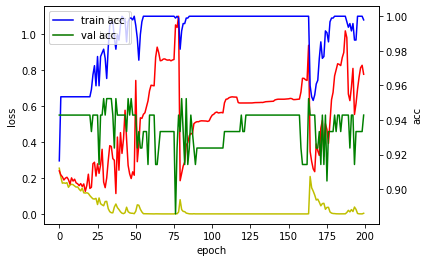

18/18 - 0s - loss: 1.6628 - accuracy: 0.8545
[[466  34]
 [ 46   4]]

 [500  50]
sensitivity :  0.08
specificity :  0.932


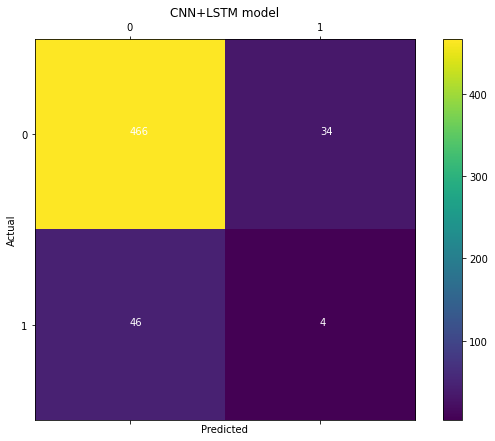

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 768, 2)]          0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 768, 16)           112       
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 256, 16)           0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 256, 32)           1568      
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 85, 32)            0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 85, 64)            6208      
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 28, 64)            0   

24/24 [==============================] - 0s 17ms/step - loss: 0.0160 - accuracy: 0.9926 - val_loss: 0.0497 - val_accuracy: 0.9810
Epoch 45/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0148 - accuracy: 0.9926 - val_loss: 0.0845 - val_accuracy: 0.9714
Epoch 46/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0153 - accuracy: 0.9947 - val_loss: 0.1398 - val_accuracy: 0.9714
Epoch 47/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0260 - accuracy: 0.9905 - val_loss: 0.1524 - val_accuracy: 0.9619
Epoch 48/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0220 - accuracy: 0.9884 - val_loss: 0.0618 - val_accuracy: 0.9714
Epoch 49/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0090 - accuracy: 0.9968 - val_loss: 0.0703 - val_accuracy: 0.9714
Epoch 50/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0086 - accuracy: 0.9968 - val_loss: 0.0782 - val_accuracy: 0.9524
Epoch 51/200

24/24 [==============================] - 0s 17ms/step - loss: 0.0130 - accuracy: 0.9947 - val_loss: 0.0761 - val_accuracy: 0.9810
Epoch 102/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0103 - accuracy: 0.9968 - val_loss: 0.0995 - val_accuracy: 0.9810
Epoch 103/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0095 - accuracy: 0.9968 - val_loss: 0.0749 - val_accuracy: 0.9810
Epoch 104/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0089 - accuracy: 0.9968 - val_loss: 0.1495 - val_accuracy: 0.9714
Epoch 105/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0047 - accuracy: 0.9979 - val_loss: 0.1275 - val_accuracy: 0.9714
Epoch 106/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0232 - accuracy: 0.9947 - val_loss: 0.1478 - val_accuracy: 0.9714
Epoch 107/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0617 - accuracy: 0.9788 - val_loss: 0.0487 - val_accuracy: 0.9714
Epoch 

24/24 [==============================] - 0s 17ms/step - loss: 7.6429e-04 - accuracy: 1.0000 - val_loss: 0.1239 - val_accuracy: 0.9810
Epoch 158/200
24/24 [==============================] - 0s 17ms/step - loss: 2.3190e-04 - accuracy: 1.0000 - val_loss: 0.1621 - val_accuracy: 0.9714
Epoch 159/200
24/24 [==============================] - 0s 16ms/step - loss: 4.0562e-05 - accuracy: 1.0000 - val_loss: 0.1676 - val_accuracy: 0.9714
Epoch 160/200
24/24 [==============================] - 0s 16ms/step - loss: 0.0025 - accuracy: 0.9989 - val_loss: 0.1803 - val_accuracy: 0.9905
Epoch 161/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0062 - accuracy: 0.9989 - val_loss: 0.2148 - val_accuracy: 0.9714
Epoch 162/200
24/24 [==============================] - 0s 17ms/step - loss: 4.1221e-04 - accuracy: 1.0000 - val_loss: 0.2440 - val_accuracy: 0.9714
Epoch 163/200
24/24 [==============================] - 0s 17ms/step - loss: 1.2866e-04 - accuracy: 1.0000 - val_loss: 0.2502 - val_acc

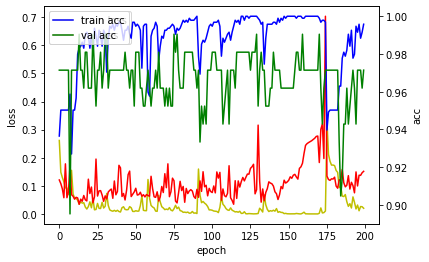

18/18 - 0s - loss: 0.2340 - accuracy: 0.9491
[[492   8]
 [ 20  30]]

 [500  50]
sensitivity :  0.6
specificity :  0.984


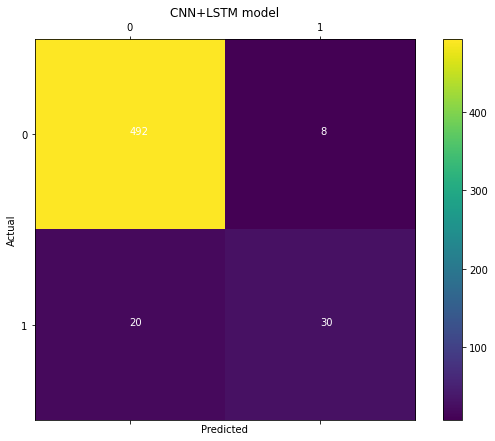

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 768, 2)]          0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 768, 16)           112       
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 256, 16)           0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 256, 32)           1568      
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 85, 32)            0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 85, 64)            6208      
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 28, 64)            0   

24/24 [==============================] - 0s 16ms/step - loss: 0.0286 - accuracy: 0.9884 - val_loss: 0.4078 - val_accuracy: 0.9429
Epoch 45/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0171 - accuracy: 0.9958 - val_loss: 0.4193 - val_accuracy: 0.9238
Epoch 46/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0089 - accuracy: 0.9979 - val_loss: 0.5166 - val_accuracy: 0.9333
Epoch 47/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0102 - accuracy: 0.9958 - val_loss: 0.5921 - val_accuracy: 0.9333
Epoch 48/200
24/24 [==============================] - 0s 16ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.5406 - val_accuracy: 0.9333
Epoch 49/200
24/24 [==============================] - 0s 16ms/step - loss: 0.0131 - accuracy: 0.9958 - val_loss: 0.4515 - val_accuracy: 0.9238
Epoch 50/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0158 - accuracy: 0.9958 - val_loss: 0.5367 - val_accuracy: 0.9429
Epoch 51/200

24/24 [==============================] - 0s 17ms/step - loss: 0.0134 - accuracy: 0.9968 - val_loss: 0.7156 - val_accuracy: 0.9238
Epoch 101/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.8513 - val_accuracy: 0.9333
Epoch 102/200
24/24 [==============================] - 0s 16ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.9320 - val_accuracy: 0.9333
Epoch 103/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0198 - accuracy: 0.9968 - val_loss: 0.5802 - val_accuracy: 0.9238
Epoch 104/200
24/24 [==============================] - 0s 16ms/step - loss: 0.0040 - accuracy: 0.9979 - val_loss: 0.8601 - val_accuracy: 0.9143
Epoch 105/200
24/24 [==============================] - 0s 16ms/step - loss: 7.5461e-04 - accuracy: 1.0000 - val_loss: 0.9343 - val_accuracy: 0.9143
Epoch 106/200
24/24 [==============================] - 0s 17ms/step - loss: 5.5090e-04 - accuracy: 1.0000 - val_loss: 0.9570 - val_accuracy: 0.933

Epoch 156/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0187 - accuracy: 0.9926 - val_loss: 0.6897 - val_accuracy: 0.9238
Epoch 157/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0094 - accuracy: 0.9979 - val_loss: 0.8596 - val_accuracy: 0.9238
Epoch 158/200
24/24 [==============================] - 0s 16ms/step - loss: 0.0200 - accuracy: 0.9905 - val_loss: 0.7826 - val_accuracy: 0.9524
Epoch 159/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0086 - accuracy: 0.9979 - val_loss: 0.7412 - val_accuracy: 0.9333
Epoch 160/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.8248 - val_accuracy: 0.9429
Epoch 161/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0211 - accuracy: 0.9937 - val_loss: 0.8085 - val_accuracy: 0.9143
Epoch 162/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.6527 - val_accuracy:

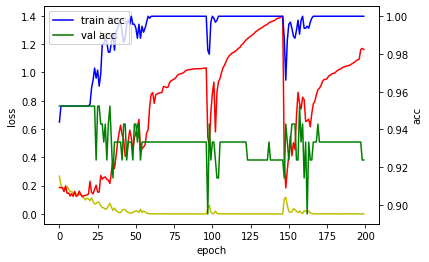

18/18 - 0s - loss: 2.3000 - accuracy: 0.8582
[[471  29]
 [ 49   1]]

 [500  50]
sensitivity :  0.02
specificity :  0.942


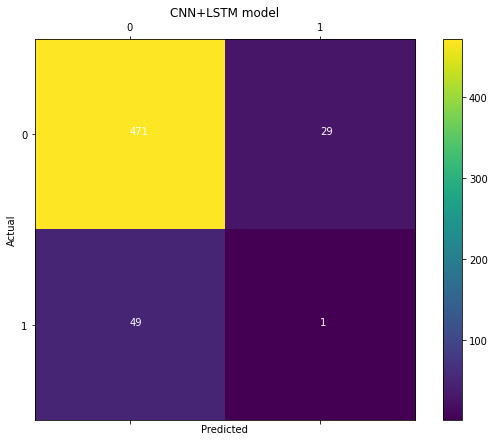

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 768, 2)]          0         
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 768, 16)           112       
_________________________________________________________________
max_pooling1d_24 (MaxPooling (None, 256, 16)           0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 256, 32)           1568      
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 85, 32)            0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 85, 64)            6208      
_________________________________________________________________
max_pooling1d_26 (MaxPooling (None, 28, 64)            0   

24/24 [==============================] - 0s 16ms/step - loss: 0.0039 - accuracy: 0.9979 - val_loss: 0.6063 - val_accuracy: 0.9333
Epoch 45/200
24/24 [==============================] - 0s 17ms/step - loss: 8.6053e-04 - accuracy: 1.0000 - val_loss: 0.7040 - val_accuracy: 0.9238
Epoch 46/200
24/24 [==============================] - 0s 17ms/step - loss: 4.0153e-04 - accuracy: 1.0000 - val_loss: 0.7652 - val_accuracy: 0.9238
Epoch 47/200
24/24 [==============================] - 0s 17ms/step - loss: 8.6608e-05 - accuracy: 1.0000 - val_loss: 0.7401 - val_accuracy: 0.9333
Epoch 48/200
24/24 [==============================] - 0s 17ms/step - loss: 1.9492e-04 - accuracy: 1.0000 - val_loss: 0.7462 - val_accuracy: 0.9333
Epoch 49/200
24/24 [==============================] - 0s 17ms/step - loss: 3.7699e-04 - accuracy: 1.0000 - val_loss: 0.7914 - val_accuracy: 0.9333
Epoch 50/200
24/24 [==============================] - 0s 17ms/step - loss: 3.5593e-05 - accuracy: 1.0000 - val_loss: 0.8300 - val_accur

24/24 [==============================] - 0s 17ms/step - loss: 4.9470e-06 - accuracy: 1.0000 - val_loss: 0.7688 - val_accuracy: 0.9524
Epoch 101/200
24/24 [==============================] - 0s 17ms/step - loss: 6.6598e-06 - accuracy: 1.0000 - val_loss: 0.7704 - val_accuracy: 0.9524
Epoch 102/200
24/24 [==============================] - 0s 17ms/step - loss: 5.4633e-06 - accuracy: 1.0000 - val_loss: 0.7718 - val_accuracy: 0.9524
Epoch 103/200
24/24 [==============================] - 0s 17ms/step - loss: 6.0227e-06 - accuracy: 1.0000 - val_loss: 0.7731 - val_accuracy: 0.9524
Epoch 104/200
24/24 [==============================] - 0s 17ms/step - loss: 5.5154e-06 - accuracy: 1.0000 - val_loss: 0.7741 - val_accuracy: 0.9524
Epoch 105/200
24/24 [==============================] - 0s 17ms/step - loss: 7.8291e-06 - accuracy: 1.0000 - val_loss: 0.7774 - val_accuracy: 0.9524
Epoch 106/200
24/24 [==============================] - 0s 17ms/step - loss: 4.3817e-06 - accuracy: 1.0000 - val_loss: 0.7796 -

24/24 [==============================] - 0s 16ms/step - loss: 1.8371e-06 - accuracy: 1.0000 - val_loss: 0.8467 - val_accuracy: 0.9524
Epoch 156/200
24/24 [==============================] - 0s 17ms/step - loss: 1.2213e-06 - accuracy: 1.0000 - val_loss: 0.8494 - val_accuracy: 0.9524
Epoch 157/200
24/24 [==============================] - 0s 17ms/step - loss: 1.7575e-06 - accuracy: 1.0000 - val_loss: 0.8517 - val_accuracy: 0.9524
Epoch 158/200
24/24 [==============================] - 0s 17ms/step - loss: 4.8779e-06 - accuracy: 1.0000 - val_loss: 0.8550 - val_accuracy: 0.9524
Epoch 159/200
24/24 [==============================] - 0s 17ms/step - loss: 4.2905e-07 - accuracy: 1.0000 - val_loss: 0.8551 - val_accuracy: 0.9524
Epoch 160/200
24/24 [==============================] - 0s 17ms/step - loss: 9.5991e-07 - accuracy: 1.0000 - val_loss: 0.8558 - val_accuracy: 0.9524
Epoch 161/200
24/24 [==============================] - 0s 16ms/step - loss: 6.2809e-07 - accuracy: 1.0000 - val_loss: 0.8560 -

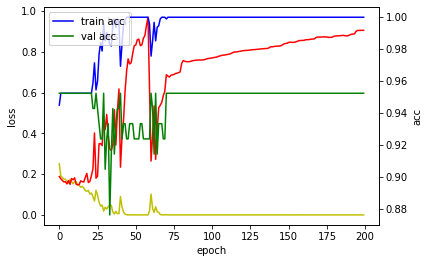

18/18 - 0s - loss: 2.4322 - accuracy: 0.8727
[[478  22]
 [ 48   2]]

 [500  50]
sensitivity :  0.04
specificity :  0.956


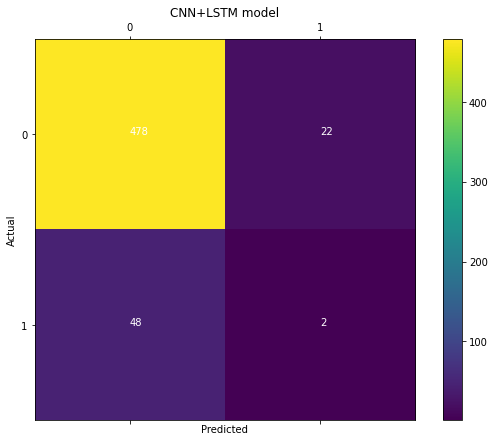

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 768, 2)]          0         
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 768, 16)           112       
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 256, 16)           0         
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 256, 32)           1568      
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 85, 32)            0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 85, 64)            6208      
_________________________________________________________________
max_pooling1d_29 (MaxPooling (None, 28, 64)            0   

24/24 [==============================] - 0s 16ms/step - loss: 0.0409 - accuracy: 0.9852 - val_loss: 0.0708 - val_accuracy: 0.9429
Epoch 45/200
24/24 [==============================] - 0s 16ms/step - loss: 0.0316 - accuracy: 0.9894 - val_loss: 0.0758 - val_accuracy: 0.9619
Epoch 46/200
24/24 [==============================] - 0s 16ms/step - loss: 0.0369 - accuracy: 0.9884 - val_loss: 0.0933 - val_accuracy: 0.9714
Epoch 47/200
24/24 [==============================] - 0s 17ms/step - loss: 0.1053 - accuracy: 0.9619 - val_loss: 0.0471 - val_accuracy: 0.9810
Epoch 48/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0484 - accuracy: 0.9767 - val_loss: 0.0678 - val_accuracy: 0.9714
Epoch 49/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0354 - accuracy: 0.9862 - val_loss: 0.1044 - val_accuracy: 0.9429
Epoch 50/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0531 - accuracy: 0.9767 - val_loss: 0.0980 - val_accuracy: 0.9429
Epoch 51/200

24/24 [==============================] - 0s 16ms/step - loss: 3.1651e-04 - accuracy: 1.0000 - val_loss: 0.1885 - val_accuracy: 0.9714
Epoch 102/200
24/24 [==============================] - 0s 17ms/step - loss: 3.2412e-04 - accuracy: 1.0000 - val_loss: 0.1973 - val_accuracy: 0.9714
Epoch 103/200
24/24 [==============================] - 0s 17ms/step - loss: 1.2134e-04 - accuracy: 1.0000 - val_loss: 0.1983 - val_accuracy: 0.9714
Epoch 104/200
24/24 [==============================] - 0s 16ms/step - loss: 2.2059e-04 - accuracy: 1.0000 - val_loss: 0.1828 - val_accuracy: 0.9714
Epoch 105/200
24/24 [==============================] - 0s 16ms/step - loss: 8.8924e-05 - accuracy: 1.0000 - val_loss: 0.1805 - val_accuracy: 0.9714
Epoch 106/200
24/24 [==============================] - 0s 16ms/step - loss: 1.6676e-04 - accuracy: 1.0000 - val_loss: 0.1871 - val_accuracy: 0.9714
Epoch 107/200
24/24 [==============================] - 0s 16ms/step - loss: 2.0837e-04 - accuracy: 1.0000 - val_loss: 0.2039 -

24/24 [==============================] - 0s 17ms/step - loss: 9.9019e-05 - accuracy: 1.0000 - val_loss: 0.2574 - val_accuracy: 0.9714
Epoch 158/200
24/24 [==============================] - 0s 17ms/step - loss: 8.5998e-05 - accuracy: 1.0000 - val_loss: 0.2860 - val_accuracy: 0.9714
Epoch 159/200
24/24 [==============================] - 0s 17ms/step - loss: 1.2475e-04 - accuracy: 1.0000 - val_loss: 0.2966 - val_accuracy: 0.9714
Epoch 160/200
24/24 [==============================] - 0s 17ms/step - loss: 1.4878e-05 - accuracy: 1.0000 - val_loss: 0.2936 - val_accuracy: 0.9714
Epoch 161/200
24/24 [==============================] - 0s 17ms/step - loss: 7.6283e-06 - accuracy: 1.0000 - val_loss: 0.2948 - val_accuracy: 0.9714
Epoch 162/200
24/24 [==============================] - 0s 17ms/step - loss: 2.3515e-05 - accuracy: 1.0000 - val_loss: 0.2993 - val_accuracy: 0.9714
Epoch 163/200
24/24 [==============================] - 0s 17ms/step - loss: 7.2907e-06 - accuracy: 1.0000 - val_loss: 0.3020 -

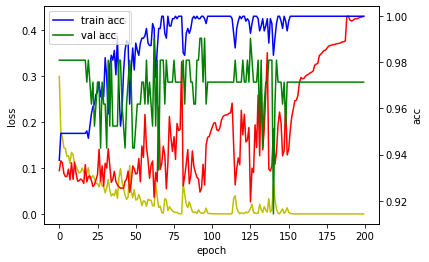

18/18 - 0s - loss: 1.8367 - accuracy: 0.9127
[[499   1]
 [ 47   3]]

 [500  50]
sensitivity :  0.06
specificity :  0.998


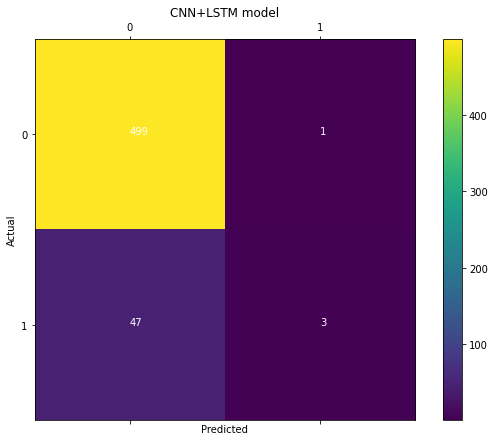

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 768, 2)]          0         
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 768, 16)           112       
_________________________________________________________________
max_pooling1d_30 (MaxPooling (None, 256, 16)           0         
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 256, 32)           1568      
_________________________________________________________________
max_pooling1d_31 (MaxPooling (None, 85, 32)            0         
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 85, 64)            6208      
_________________________________________________________________
max_pooling1d_32 (MaxPooling (None, 28, 64)            0  

24/24 [==============================] - 0s 17ms/step - loss: 1.4184e-04 - accuracy: 1.0000 - val_loss: 0.0413 - val_accuracy: 0.9905
Epoch 45/200
24/24 [==============================] - 0s 17ms/step - loss: 2.6006e-04 - accuracy: 1.0000 - val_loss: 0.0350 - val_accuracy: 0.9905
Epoch 46/200
24/24 [==============================] - 0s 17ms/step - loss: 4.6437e-04 - accuracy: 1.0000 - val_loss: 0.0206 - val_accuracy: 0.9905
Epoch 47/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0015 - accuracy: 0.9989 - val_loss: 0.0680 - val_accuracy: 0.9905
Epoch 48/200
24/24 [==============================] - 0s 16ms/step - loss: 0.0125 - accuracy: 0.9958 - val_loss: 3.9932e-04 - val_accuracy: 1.0000
Epoch 49/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0420 - accuracy: 0.9852 - val_loss: 0.0286 - val_accuracy: 0.9905
Epoch 50/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0206 - accuracy: 0.9894 - val_loss: 0.0147 - val_accuracy: 0.9

24/24 [==============================] - 0s 17ms/step - loss: 1.1775e-05 - accuracy: 1.0000 - val_loss: 0.1156 - val_accuracy: 0.9905
Epoch 101/200
24/24 [==============================] - 0s 17ms/step - loss: 1.9431e-05 - accuracy: 1.0000 - val_loss: 0.1135 - val_accuracy: 0.9905
Epoch 102/200
24/24 [==============================] - 0s 17ms/step - loss: 1.3399e-05 - accuracy: 1.0000 - val_loss: 0.1112 - val_accuracy: 0.9905
Epoch 103/200
24/24 [==============================] - 0s 17ms/step - loss: 9.4811e-06 - accuracy: 1.0000 - val_loss: 0.1112 - val_accuracy: 0.9905
Epoch 104/200
24/24 [==============================] - 0s 17ms/step - loss: 8.0338e-06 - accuracy: 1.0000 - val_loss: 0.1112 - val_accuracy: 0.9905
Epoch 105/200
24/24 [==============================] - 0s 17ms/step - loss: 1.3892e-05 - accuracy: 1.0000 - val_loss: 0.1156 - val_accuracy: 0.9905
Epoch 106/200
24/24 [==============================] - 0s 17ms/step - loss: 7.2606e-06 - accuracy: 1.0000 - val_loss: 0.1159 -

24/24 [==============================] - 0s 17ms/step - loss: 2.7819e-06 - accuracy: 1.0000 - val_loss: 0.0487 - val_accuracy: 0.9905
Epoch 157/200
24/24 [==============================] - 0s 17ms/step - loss: 1.3798e-05 - accuracy: 1.0000 - val_loss: 0.0526 - val_accuracy: 0.9905
Epoch 158/200
24/24 [==============================] - 0s 17ms/step - loss: 2.8529e-06 - accuracy: 1.0000 - val_loss: 0.0573 - val_accuracy: 0.9905
Epoch 159/200
24/24 [==============================] - 0s 17ms/step - loss: 1.9469e-05 - accuracy: 1.0000 - val_loss: 0.0622 - val_accuracy: 0.9905
Epoch 160/200
24/24 [==============================] - 0s 17ms/step - loss: 2.1802e-06 - accuracy: 1.0000 - val_loss: 0.0642 - val_accuracy: 0.9905
Epoch 161/200
24/24 [==============================] - 0s 17ms/step - loss: 4.0097e-06 - accuracy: 1.0000 - val_loss: 0.0654 - val_accuracy: 0.9905
Epoch 162/200
24/24 [==============================] - 0s 17ms/step - loss: 5.0319e-06 - accuracy: 1.0000 - val_loss: 0.0672 -

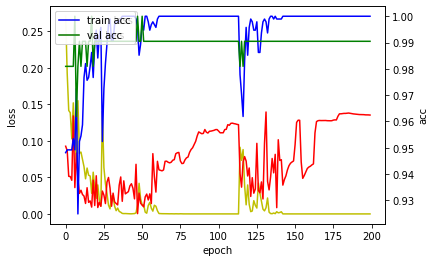

18/18 - 0s - loss: 0.9504 - accuracy: 0.9345
[[496   4]
 [ 32  18]]

 [500  50]
sensitivity :  0.36
specificity :  0.992


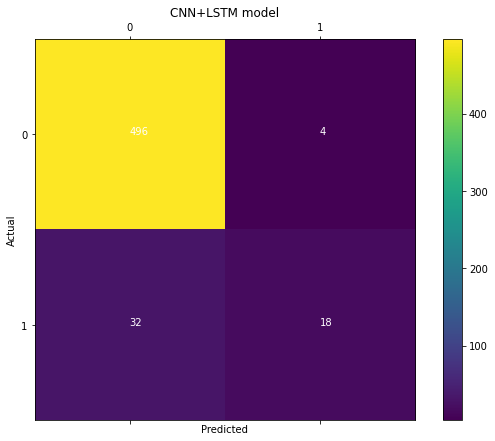

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 768, 2)]          0         
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 768, 16)           112       
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 256, 16)           0         
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 256, 32)           1568      
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 85, 32)            0         
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 85, 64)            6208      
_________________________________________________________________
max_pooling1d_35 (MaxPooling (None, 28, 64)            0  

24/24 [==============================] - 0s 17ms/step - loss: 0.0180 - accuracy: 0.9926 - val_loss: 0.0501 - val_accuracy: 0.9905
Epoch 45/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0114 - accuracy: 0.9947 - val_loss: 0.0694 - val_accuracy: 0.9905
Epoch 46/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0094 - accuracy: 0.9968 - val_loss: 0.2703 - val_accuracy: 0.9619
Epoch 47/200
24/24 [==============================] - 0s 16ms/step - loss: 0.0503 - accuracy: 0.9788 - val_loss: 0.0699 - val_accuracy: 0.9524
Epoch 48/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0551 - accuracy: 0.9799 - val_loss: 0.0621 - val_accuracy: 0.9619
Epoch 49/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0219 - accuracy: 0.9947 - val_loss: 0.1461 - val_accuracy: 0.9619
Epoch 50/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0114 - accuracy: 0.9947 - val_loss: 0.2731 - val_accuracy: 0.9619
Epoch 51/200

Epoch 101/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0148 - accuracy: 0.9958 - val_loss: 0.0451 - val_accuracy: 0.9905
Epoch 102/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0098 - accuracy: 0.9947 - val_loss: 0.0495 - val_accuracy: 0.9905
Epoch 103/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0055 - accuracy: 0.9979 - val_loss: 0.1016 - val_accuracy: 0.9714
Epoch 104/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1101 - val_accuracy: 0.9714
Epoch 105/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0011 - accuracy: 0.9989 - val_loss: 0.0555 - val_accuracy: 0.9905
Epoch 106/200
24/24 [==============================] - 0s 16ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1257 - val_accuracy: 0.9714
Epoch 107/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0025 - accuracy: 0.9989 - val_loss: 0.0888 - val_accuracy:

24/24 [==============================] - 0s 17ms/step - loss: 7.5500e-06 - accuracy: 1.0000 - val_loss: 0.3122 - val_accuracy: 0.9714
Epoch 158/200
24/24 [==============================] - 0s 16ms/step - loss: 1.1831e-05 - accuracy: 1.0000 - val_loss: 0.3115 - val_accuracy: 0.9714
Epoch 159/200
24/24 [==============================] - 0s 17ms/step - loss: 2.5011e-05 - accuracy: 1.0000 - val_loss: 0.3135 - val_accuracy: 0.9714
Epoch 160/200
24/24 [==============================] - 0s 17ms/step - loss: 1.5343e-05 - accuracy: 1.0000 - val_loss: 0.3197 - val_accuracy: 0.9714
Epoch 161/200
24/24 [==============================] - 0s 17ms/step - loss: 8.5116e-05 - accuracy: 1.0000 - val_loss: 0.3303 - val_accuracy: 0.9714
Epoch 162/200
24/24 [==============================] - 0s 17ms/step - loss: 1.3777e-05 - accuracy: 1.0000 - val_loss: 0.3474 - val_accuracy: 0.9714
Epoch 163/200
24/24 [==============================] - 0s 17ms/step - loss: 1.1256e-05 - accuracy: 1.0000 - val_loss: 0.3521 -

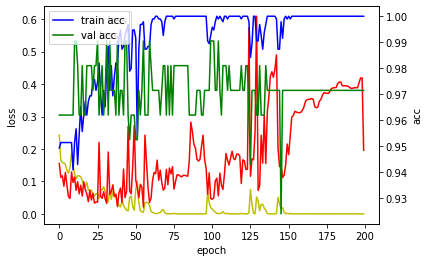

18/18 - 0s - loss: 1.4811 - accuracy: 0.8709
[[462  38]
 [ 33  17]]

 [500  50]
sensitivity :  0.34
specificity :  0.924


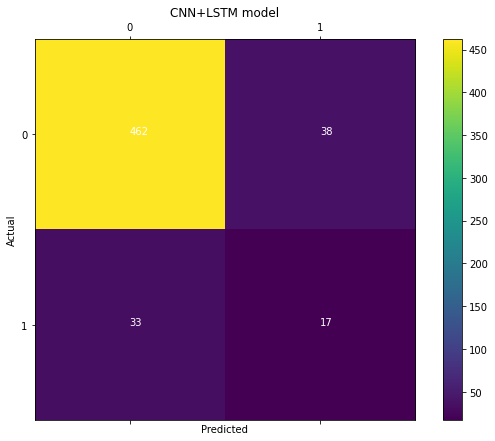

average_accuracy
0.8966942158612338
average_sensitivity
0.14909090909090908
average_specificity
0.9714545454545455


In [21]:
# 평가 지표
test_pre_all = []
conf_mat_all = []
test_loss_all = []
test_acc_all = []
test_sen_all = []
test_spe_all = []

# origin_sub 마다 모델 학습
for i in range(origin_sub_cnt):
    
    train_label = np.zeros((origin_sub_cnt+public1_sub_cnt) * train_sub_size)
    test_label = np.zeros(origin_sub_cnt * test_sub_size)

    for j in range(len(train_label)):
        if (j >= i * train_sub_size) and (j < (i + 1) * train_sub_size):
            train_label[j] = 1

    for j in range(len(test_label)):
        if (j >= i * test_sub_size) and (j < (i + 1) * test_sub_size):
            test_label[j] = 1    

    ################################################################
    # 모델 구성하기                                                #
    # 이진 분류이기 때문에 0~1 사이의 값을 나타내는 출력뉴런 1개   #
    ################################################################

    # Cnn 층
    inputs = tf.keras.Input(shape = (768, 2))

    layers = tf.keras.layers.Conv1D(filters = 16, kernel_size = 3, strides = 1, padding = 'same', activation  = 'relu')(inputs)
    layers = tf.keras.layers.MaxPool1D(3)(layers)

    layers = tf.keras.layers.Conv1D(filters = 32, kernel_size = 3, strides = 1, padding = 'same', activation  = 'relu')(layers)
    layers = tf.keras.layers.MaxPool1D(3)(layers)

    layers = tf.keras.layers.Conv1D(filters = 64, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu')(layers)
    layers = tf.keras.layers.MaxPool1D(3)(layers)

    # layers = tf.keras.layers.Conv1D(filters= 128, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu')(layers)
    # layers = tf.keras.layers.MaxPool1D(3)(layers)

    # LSTM 층
    layers = tf.keras.layers.LSTM(64)(layers)

    # Dense 층
    layers = tf.keras.layers.Dropout(0.3)(layers)
    layers = tf.keras.layers.Dense(128, activation='relu')(layers)
    # layers = tf.keras.layers.Dropout(0.01)(layers)
    layers = tf.keras.layers.Dense(64, activation='relu')(layers)
    # layers = tf.keras.layers.Dropout(0.05)(layers)
    layers = tf.keras.layers.Dense(1, activation='sigmoid')(layers)

    model = tf.keras.models.Model(inputs = inputs, outputs = layers)
    model.compile(loss= 'binary_crossentropy', optimizer= tf.keras.optimizers.Adam(0.005), metrics=['accuracy'])
    model.summary()
    
    # train 데이터를 train과 validation으로 분배
    # validation 데이터를 여러 sub에서 가져갈 수 있도록 shuffle
    x_train, x_val, y_train, y_val = train_test_split(train_data, train_label, test_size=0.1, shuffle=True, random_state=1)
    
    print('##########')
    print('# sub', i+1, ' #')
    print('##########')

    # 모델 돌리기
    hist = model.fit(x_train, y_train, batch_size=40, epochs=200, validation_data=(x_val, y_val), verbose=1)
#     hist = model.fit(x_train, y_train, batch_size=40, epochs=200, valid'ation_data=(x_val, y_val), verbose=1)
    
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    
    loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')
    
    
    acc_ax.plot(hist.history['accuracy'], 'b', label = 'train acc')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label = 'val acc')
    acc_ax.set_ylabel('acc')
    acc_ax.legend(loc='upper left')
    
    plt.show()
    
    # save model
    model.save('Sub_Model_' + str(sub_cnt + 1) + '.h5')
    
    test_loss, test_acc = model.evaluate(test_data, test_label, verbose= 2)
    test_pred = model.predict(test_data)
    
    test_loss_all.append(test_loss)
    test_acc_all.append(test_acc)
    
    # 확률이 0.5이상이면 자신(1), 작으면 타인(0)
    for i in range(len(test_pred)):
        if(0.5 <= test_pred[i]):
            test_pred[i] = 1

        else:
            test_pred[i] = 0
            
            
    test_pre_all.append(test_pred)
    
    # confusion matrix 생성
    conf_matrix = confusion_matrix(test_label, test_pred)
    
    #############################################################
    #       conf_matrix[0][0] = TN      conf_matrix[0][1] = FP  #
    #       conf_matrix[1][0] = FN      conf_matrix[1][1] = TP  #
    #############################################################

    print(conf_matrix)
    conf_mat_all.append(conf_matrix)

    # sum 이용 각 행 더하기
    row = conf_matrix.sum(axis=1)
    print('\n', row)

    # row[0] = spec의 분모, row[1] = sens의 분모

    test_sensitivity = conf_matrix[1][1] / row[1]
    test_specificity = conf_matrix[0][0] / row[0]

    print('sensitivity : ', test_sensitivity)
    print('specificity : ', test_specificity) 
    
    test_sen_all.append(test_sensitivity)
    test_spe_all.append(test_specificity)
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111)

    cax = ax.matshow(conf_matrix)

    fig.colorbar(cax)

    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
        plt.text(j, i, conf_matrix[i, j], color="white")

    plt.title('CNN+LSTM model')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.show()
    
print('average_accuracy')
print(np.mean(test_acc_all))
print('average_sensitivity')
print(np.mean(test_sen_all))
print('average_specificity')
print(np.mean(test_spe_all))